# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting, based on measurements of contaminants collected over a year, whether it may be harmful to health or not.

- FECHA. Date recorded at the time of taking pollutant values (numeric)
- N_CCAA. Name of each autonomous community in Spain where measurement data for each pollutant has been collected (categorical)
- PROVINCIA. Name of each province where measurement data for each pollutant has been collected (categorical)
- N_MUNICIPIO. Name of each municipality where measurement data for each pollutant has been collected (categorical)
- ESTACION. Number assigned to each station of each autonomous community that has recorded pollutant measurement data (numeric)
- MAGNITUD. Each pollutant that has been recorded in the different stations (categorical)
- LATITUD, LONGITUD. Geographic data of each station where the pollutants have been recorded (numeric)
- H01, H02, H03... H24. Recorded value per hour of each pollutant. All contaminants have been taken with unified measurement units (µg/m3)(numeric)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pickle import dump
import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/processed/Madrid_pollutants.csv')
df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-01,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.8,1.6,1.3,1.2,1.0,0.9,0.8,0.9,0.7,0.5,0.5,0.5,0.6,0.5,0.4,0.3,0.5,0.7,1.5,1.9,2.0,1.7,1.5
1,2022-01-02,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.2,1.2,1.0,0.9,0.9,0.8,0.8,0.8,1.0,0.7,0.7,0.6,0.6,0.4,0.5,0.8,0.5,0.9,1.2,1.5,1.9,1.2,1.6,1.5
2,2022-01-03,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.5,1.3,1.1,1.0,1.0,0.9,1.0,1.2,2.3,1.8,1.3,0.8,0.5,0.8,0.8,0.9,0.9,1.2,0.9,0.8,1.1,1.5,1.5,2.1
3,2022-01-04,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.6,1.5,1.6,1.5,1.4,3.5,3.1,1.1,1.2,1.2,1.2,0.8,0.7,0.8,0.6,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.3
4,2022-01-05,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.9,0.5,0.5,0.4,0.5,0.5,0.4,0.3,0.4,0.4,0.4,0.4,0.4,0.7,0.6,0.5


### **1. Define the target**

In [4]:
# Lista de columnas de las cuales quieres calcular la media
columnas_h = [col for col in df.columns if col.startswith('H')]

# Calcular la media de esas columnas para cada fila
df['Media_Diaria'] = df[columnas_h].mean(axis=1)

In [5]:
# Función para clasificar los valores de peligrosidad de cada contaminante
def clasificar_peligrosidad(valor, umbrales):
    if valor < umbrales['bajo']:
        return 'Baja'
    elif valor < umbrales['alto']:
        return 'Normal'
    else:
        return 'Alta'

# Aplicar la función a cada fila del DataFrame
def clasificar_fila(row):
    contaminante = row['MAGNITUD']
    valor = row['Media_Diaria']
    if contaminante in umbrales_peligrosidad:
        return clasificar_peligrosidad(valor, umbrales_peligrosidad[contaminante])

# Supongamos que estos son tus umbrales de peligrosidad definidos para 8 contaminantes
umbrales_peligrosidad = {
    'SO2': {'bajo': 25, 'alto': 40},
    'CO': {'bajo': 2, 'alto': 4},
    'C6H6': {'bajo': 2, 'alto': 5},
    'NO2': {'bajo': 15, 'alto': 25},
    'PM2.5': {'bajo': 10, 'alto': 15},
    'PM10': {'bajo': 25, 'alto': 45}, 
    'NOX': {'bajo': 75, 'alto': 100},
    'O3': {'bajo': 75, 'alto': 100}
}

# Crear una nueva columna con la clasificación de peligrosidad
df['Peligrosidad'] = df.apply(clasificar_fila, axis=1)

df.head(3)

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Diaria,Peligrosidad
0,2022-01-01,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.8,1.6,1.3,1.2,1.0,0.9,0.8,0.9,0.7,0.5,0.5,0.5,0.6,0.5,0.4,0.3,0.5,0.7,1.5,1.9,2.0,1.7,1.5,1.045833,Baja
1,2022-01-02,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.2,1.2,1.0,0.9,0.9,0.8,0.8,0.8,1.0,0.7,0.7,0.6,0.6,0.4,0.5,0.8,0.5,0.9,1.2,1.5,1.9,1.2,1.6,1.5,0.966667,Baja
2,2022-01-03,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.5,1.3,1.1,1.0,1.0,0.9,1.0,1.2,2.3,1.8,1.3,0.8,0.5,0.8,0.8,0.9,0.9,1.2,0.9,0.8,1.1,1.5,1.5,2.1,1.175000,Baja


In [6]:
# Agrupar por 'Peligrosidad' y obtener estadísticas para 'magnitud'
stats_magnitud = df.groupby('Peligrosidad')['MAGNITUD'].describe()
stats_magnitud

,count,unique,top,freq
Peligrosidad,,,,
Alta,7365,4,NO2,5583
Baja,36360,8,PM10,8162
Normal,10206,5,NO2,4111


In [7]:
columnas_h = [column for column in df.columns if 'H' in column]
df = df.drop(columnas_h, axis=1)

In [9]:
df.drop('ESTACION', axis = 1, inplace= True)

In [10]:
df.to_csv('../data/processed/clean_madrid.csv', index= False)

In [11]:
madrid_df = pd.read_csv('../data/processed/clean_madrid.csv')

In [12]:
madrid_df

,N_CCAA,PROVINCIA,N_MUNICIPIO,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,Media_Diaria,Peligrosidad
0,MADRID,MADRID,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.045833,Baja
1,MADRID,MADRID,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.966667,Baja
2,MADRID,MADRID,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.175000,Baja
3,MADRID,MADRID,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.087500,Baja
4,MADRID,MADRID,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.429167,Baja
...,...,...,...,...,...,...,...,...,...,...
53926,MADRID,MADRID,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.250000,Baja
53927,MADRID,MADRID,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.791667,Baja
53928,MADRID,MADRID,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.875000,Baja
53929,MADRID,MADRID,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,3.000000,Baja


### **2. Analysis of univariate variables**

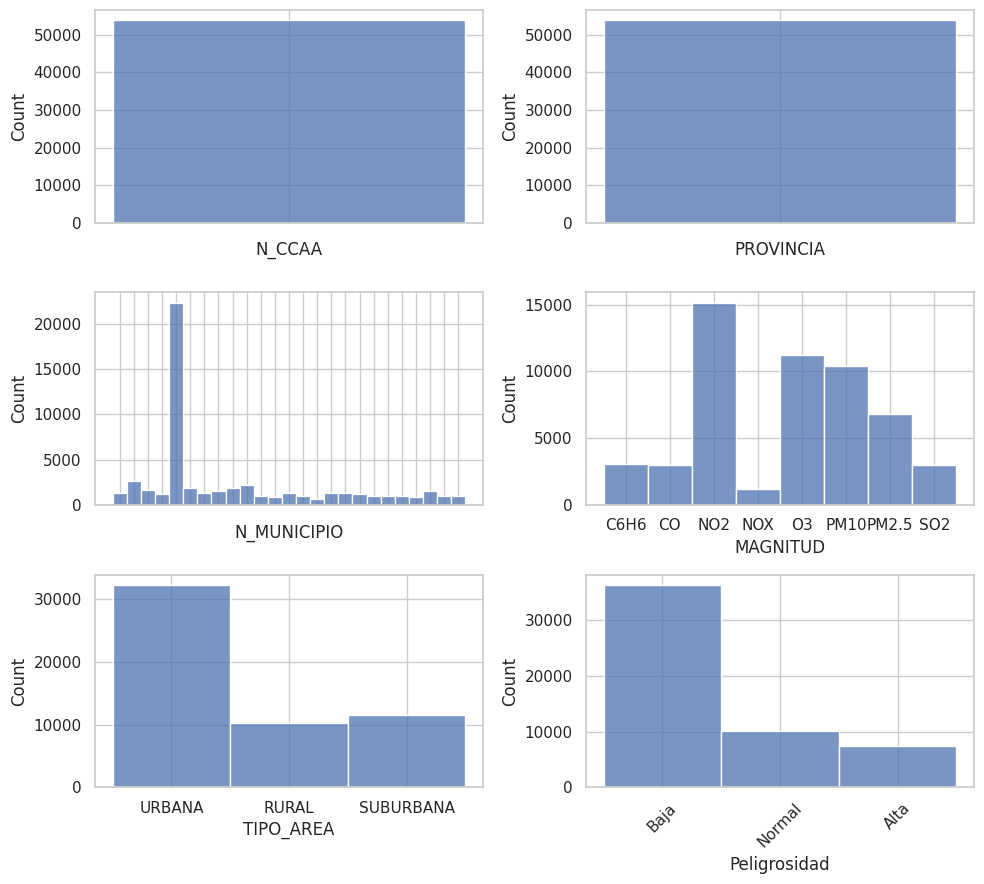

In [20]:
sns.set(style= 'whitegrid')

fig, axis = plt.subplots(3, 2, figsize=(10, 9))

# Histogramas
sns.histplot(ax=axis[0, 0], data=madrid_df, x= 'N_CCAA').set_xticklabels([])
sns.histplot(ax=axis[0, 1], data=madrid_df, x= 'PROVINCIA').set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=madrid_df, x= 'N_MUNICIPIO').set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=madrid_df, x= 'MAGNITUD')
sns.histplot(ax=axis[2, 0], data=madrid_df, x= 'TIPO_AREA')
sns.histplot(ax=axis[2, 1], data=madrid_df, x= 'Peligrosidad')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()